# Subroutine 1
Generate points based on the labels (taken as an input from the GUI)
structure of the point:
    (t0, vel, flag (1=hyperbolic, 0=linear), label)

In [1]:
import random
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline


def points_gen(nDA,nR,nCN):
    # The function generates random values of t0 - velocity pairs
    # based on number of requested waves:
    # nDA - number of direct waves (linear moveout, label 'D')
    # nR - number of reflections (hyperbolic moveout, label 'R')
    # nCN - number of coherent noise events (linear moveout, label 'N')
    # outputs (nDA+nR+nCN) * (4) list
    # each point in the list has the following structure
    # [t0 (intercept time), velocity, flag(1=hyperbolic, 0=linear), label(see above))]
    
    
    # direct arrival
    direct = []
    n = 1
    while (n <= nDA):
        direct.append([0,random.uniform(.5,1.5),0,'D'])
        n = n+1
    
    n = 1
    reflected = []
    while (n <= nR):
        reflected.append([random.uniform(0,4),random.uniform(1.5,5),1,'R'])
        n = n+1
        
    n = 1
    noise = []
    while (n <= nCN):
        noise.append([random.uniform(-2,2),random.uniform(-3,3),0,'N'])
        n = n+1
        
    events = direct + reflected + noise
    return events

In [2]:
def points_plot(events):
    x = [x/1000 for x in range(0,2000,25)]
    
    fig, ax = plt.subplots()
    
    # plot waves
    for i in events:
        if i[3] == 'D':
            y = [offset/i[1] for offset in x]
            ax.plot(x,y,'r')
        if i[3] == 'N':
            ax.plot(x,[i[0]+offset/i[1] for offset in x],'b')
        if i[3] == 'R':
            ax.plot(x,[np.sqrt(i[0]**2 + offset**2 / i[1]**2) for offset in x],'g')
    
    plt.ylabel('Time, s')
    plt.xlabel('Offset, km')
    ax.set_xlim([0,2])
    ax.set_ylim([0,4])
    ax.invert_yaxis()
    ax.set_aspect(1)
    return ax

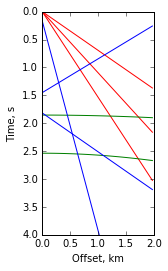

In [3]:
events=points_gen(3,2,3)
ax = points_plot(events)
plt.show(ax)

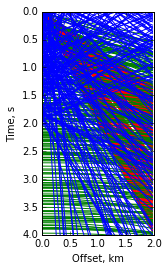

In [15]:
events2=points_gen(300,200,300)
ax2 = points_plot(events2)
plt.show(ax2)

In [18]:
events2

[[0, 0.660229796835305, 0, 'D'],
 [0, 0.5144141587604724, 0, 'D'],
 [0, 1.3754734962133046, 0, 'D'],
 [0, 1.123758720334701, 0, 'D'],
 [0, 1.2686150659913071, 0, 'D'],
 [0, 0.5220098832144695, 0, 'D'],
 [0, 0.8323504432636329, 0, 'D'],
 [0, 1.4169186158072398, 0, 'D'],
 [0, 1.0516138724688262, 0, 'D'],
 [0, 1.2328411923005984, 0, 'D'],
 [0, 0.6857748647690136, 0, 'D'],
 [0, 0.8615050838382672, 0, 'D'],
 [0, 1.3094644578760823, 0, 'D'],
 [0, 1.222984422710647, 0, 'D'],
 [0, 0.5586970368918521, 0, 'D'],
 [0, 1.0701788923753592, 0, 'D'],
 [0, 1.1125914520235913, 0, 'D'],
 [0, 1.4062651221885913, 0, 'D'],
 [0, 0.9797527461206663, 0, 'D'],
 [0, 1.4409874872526143, 0, 'D'],
 [0, 1.3802366463883011, 0, 'D'],
 [0, 1.2286507535741373, 0, 'D'],
 [0, 1.4601047754597136, 0, 'D'],
 [0, 1.1485446524253597, 0, 'D'],
 [0, 0.5993786780048153, 0, 'D'],
 [0, 1.3508619711470122, 0, 'D'],
 [0, 0.8375134273156527, 0, 'D'],
 [0, 0.716026601780445, 0, 'D'],
 [0, 1.3728747761915092, 0, 'D'],
 [0, 0.59173695142

In [4]:
events

[[0, 0.9135223583887473, 0, 'D'],
 [0, 1.4421557360093322, 0, 'D'],
 [0, 0.6526980285005883, 0, 'D'],
 [1.8543125517805774, 4.701596542048239, 1, 'R'],
 [2.5377125273967662, 2.3862702388506345, 1, 'R'],
 [1.8161033848601011, 1.4377542505789283, 0, 'N'],
 [1.4523050105621675, -1.6537627640963692, 0, 'N'],
 [0.16421942842386406, 0.26634345847669527, 0, 'N']]

In [20]:
x = [x/1000 for x in range(0,2000,25)]
ax.plot(x,[offset/.5 for offset in x],'r')

In [21]:
plt.show()

In [22]:
def t_linear(x, v, t):
    # return a linear event (direct or coherent noise)
    return t + x/v

def t_reflected(x,v,t):
    return np.sqrt(t**2 + x**2 / v**2)

In [23]:
import random
import numpy as np
import matplotlib.pylab as plt


def points_gen_dict(x,nDA=1,nR=1,nCN=1):
    # The function generates random values of t0 - velocity pairs
    # based on number of requested waves:
    # nDA - number of direct waves (linear moveout, label 'D')
    # nR - number of reflections (hyperbolic moveout, label 'R')
    # nCN - number of coherent noise events (linear moveout, label 'N')
    # outputs (nDA+nR+nCN) * (4) list
    # each point in the list has the following structure
    # [t0 (intercept time), velocity, flag(1=hyperbolic, 0=linear), label(see above))]
    # outputs dictionary
    
    events={}
    
    # direct arrival
    events['direct'], events['reflected'], events['coherent noise'] = [],[],[]
    
    for n in range(nDA):
        events['direct'].append(t_linear(x,random.uniform(.5,1.5),0))
        
    for n in range(nR):
        events['reflected'].append(t_reflected(x,random.uniform(0,4),random.uniform(1.5,5)))
        
    for n in range(nCN):
        events['coherent noise'].append(t_linear(x,random.uniform(-2,2),random.uniform(-3,3)))
        
    return events

In [24]:
dx = .025
x = np.arange(0,2+dx,dx)

events=points_gen_dict(x,2,3,4)

In [28]:
events

{'coherent noise': [array([-0.2569263 , -0.24028974, -0.22365319, -0.20701663, -0.19038008,
         -0.17374353, -0.15710697, -0.14047042, -0.12383386, -0.10719731,
         -0.09056075, -0.0739242 , -0.05728765, -0.04065109, -0.02401454,
         -0.00737798,  0.00925857,  0.02589512,  0.04253168,  0.05916823,
          0.07580479,  0.09244134,  0.1090779 ,  0.12571445,  0.142351  ,
          0.15898756,  0.17562411,  0.19226067,  0.20889722,  0.22553377,
          0.24217033,  0.25880688,  0.27544344,  0.29207999,  0.30871654,
          0.3253531 ,  0.34198965,  0.35862621,  0.37526276,  0.39189932,
          0.40853587,  0.42517242,  0.44180898,  0.45844553,  0.47508209,
          0.49171864,  0.50835519,  0.52499175,  0.5416283 ,  0.55826486,
          0.57490141,  0.59153797,  0.60817452,  0.62481107,  0.64144763,
          0.65808418,  0.67472074,  0.69135729,  0.70799384,  0.7246304 ,
          0.74126695,  0.75790351,  0.77454006,  0.79117661,  0.80781317,
          0.82444972

(4, 0)

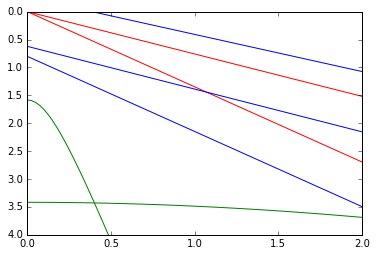

In [25]:
colors = {'direct': 'red', 'reflected': 'green', 'coherent noise': 'blue'}

for k, values in events.items():
    for array in values:
        plt.plot(x,array,c = colors[k])
plt.ylim(4,0)

(0.56666666666666665, -0.10000000000000001)

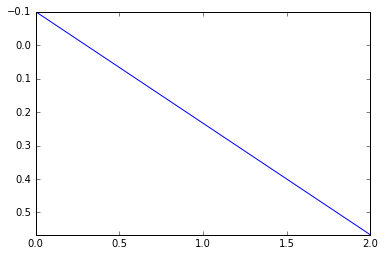

In [26]:
dt = .025
x = np.arange(0,2+dt,dt)

t = t_linear(x,3,-0.1)

plt.plot(x,t)
plt.ylim(np.amax(t),np.amin(t))

In [27]:
for key in points_gen_dict(2,3,4):
    plt.plot(x,[offset/i[1] for offset in x])
    

NameError: name 'i' is not defined